<a target="_blank" href="https://colab.research.google.com/github/Detroxsys/RP-2023-2/blob/main/Laboratorios/Lab08%20Bayes%20Caso%20Practico/Lab08_Clasificador_Bayes_Caso_Practico.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Laboratorio 08: Sklearn - Clasificador de Bayes
## Caso de estudio: Experimento de conjunto de datos de flores

<b>Conjunto de datos de flores de 17 categorías</b>:

<p>Se ha creado un conjunto de datos de flores de 17 categorías con 80 imágenes para cada clase. Las flores elegidas son algunas flores comunes en el Reino Unido. Las imágenes tienen variaciones de gran escala, pose y luz y también hay clases con grandes variaciones de imágenes dentro de la clase y una gran similitud con otras clases. Las categorías se pueden ver en la siguiente figura. Dividimos aleatoriamente el conjunto de datos en 3 conjuntos diferentes de entrenamiento, validación y prueba. Se ha etiquetado un subconjunto de las imágenes para la segmentación.</p>

<p>Ver el artículo de referencia y descargar el conjunto de datos: <a href="https://www.robots.ox.ac.uk/~vgg/data/flowers/17/">click aquí</a></p>

### Descarga el conjunto de datos

<p>Aquí hay un experimento simple. Solo descargué 1360 conjuntos de datos (58M de tamaño, 40 de cada uno de los 17 tipos de flores y una lista de nombres de imágenes txt) <a href="https://www.robots.ox.ac.uk/~vgg/data/flowers/17/17flowers.tgz">click aquí</a></p>

![imagen.png](https://www.robots.ox.ac.uk/~vgg/data/flowers/17/categories.jpg)

De acuerdo con el par txt, cada 40 hojas se clasifican en diferentes carpetas. A continuación moveremos las imagenes para sus carpetas a partir de dicha clasificación. 

<code>shutil.move()</code> Mover archivos

In [ ]:
"""1. Descargue 17 tipos de imágenes de datos de flores, cada 40 imágenes se ordenan en una carpeta
 Enlace de descarga: http://www.robots.ox.ac.uk/~vgg/data/flowers/17/
"""
import os
import shutil

n=0
label=0
with open("jpg/files.txt", "r") as f:
    for line in f.readlines():
        if n < 40:
            n = n + 1
        else:
            label = label + 1
            n = 0
        path = 'jpg/{}'.format(line.replace("\n", ""))
        path2 = 'train/{}/'.format(label) # es lo mismo que decir: 'train/'+str(label)+'/'
        if not os.path.exists(path2):
            os.makedirs(path2)
        shutil.move(path, path2 + line.replace("\n", ""))

<p>Para este caso elegiremos un conjunto de 10 categorías. El elemento X que se clasifica tiene 10 * 40 = 400 imágenes: (tomamos las 10 principales especies de flores).</p>

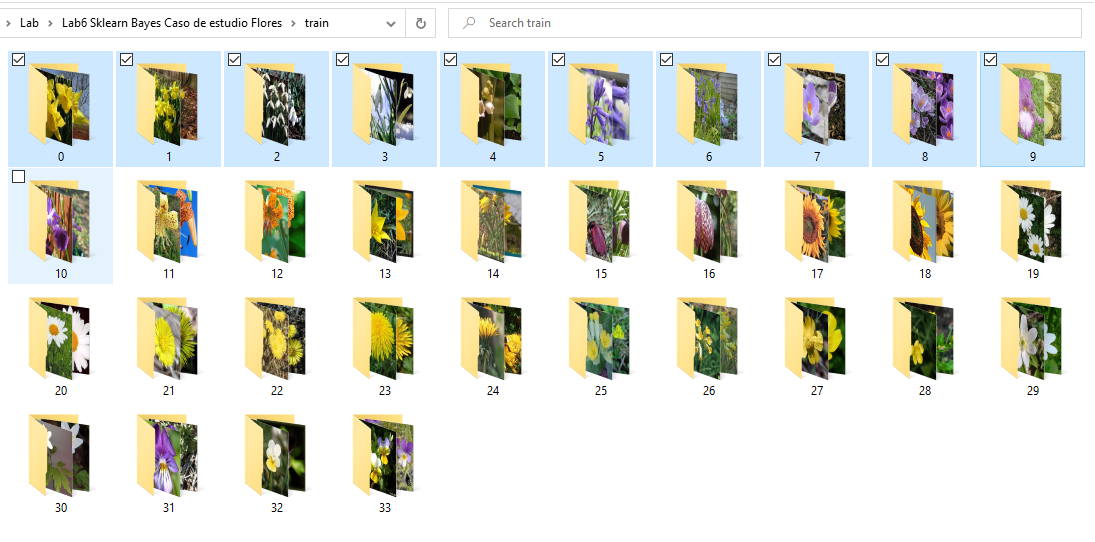

<b>Método ingenuo de Bayes:</b> Es un método de clasificación basado en el teorema de Bayes y el supuesto de independencia de las condiciones características. Es decir, se supone que los atributos son condicionalmente independientes entre sí cuando se da el valor objetivo. Es decir, ninguna variable de atributo tiene una proporción mayor del resultado de la decisión y ninguna variable de atributo tiene una proporción menor del resultado de la decisión.

<b>La clasificación de Naive Bayes se divide en tres etapas</b>
<ul>
    <li>El primer escenario--<code>Etapa de preparación</code> La tarea en esta etapa es hacer los preparativos necesarios para la clasificación de Bayes ingenua. El trabajo principal es determinar los atributos de las características de acuerdo con la situación específica, y dividir adecuadamente cada atributo de las características, y luego clasificar manualmente algunos de los elementos que se clasificarán para formar la capacitación. Coleccion de muestra. La entrada de esta etapa son todos los datos que se van a clasificar y la salida son los atributos de las características y las muestras de entrenamiento. Esta etapa es la única etapa que debe completarse manualmente en toda la clasificación Bayesiana ingenua. Su calidad tendrá un impacto importante en todo el proceso. La calidad del clasificador está determinada en gran medida por los atributos de las características, la división de atributos de las características y la calidad de la muestra de entrenamiento.</li>
    <li>Segunda etapa--<code>Fase de entrenamiento del clasificador</code> La tarea de esta etapa es generar un clasificador, el trabajo principal es calcular la frecuencia de cada categoría en la muestra de entrenamiento y la estimación de probabilidad condicional de cada división de atributo de característica para cada categoría, y registrar los resultados. La entrada son los atributos de características y las muestras de entrenamiento, y la salida es el clasificador. Esta etapa es una etapa mecánica, que el programa puede calcular automáticamente de acuerdo con la fórmula descrita anteriormente.</li>
    <li>La tercera etapa <code>Fase de aplicación</code> La tarea de esta etapa es utilizar el clasificador para clasificar los artículos a clasificar, la entrada es el clasificador y los artículos a clasificar, y la salida es la relación de mapeo entre los artículos a clasificar y la categoría. Esta etapa también es una etapa mecánica y se completa por programa.</li>
</ul>

## Ejercicio 1: Preprocesamiento. (2 puntos)

In [ ]:
"""
Clasificación y reconocimiento de Naive Bayes

1. Conjunto de entrenamiento dividido y conjunto de prueba:
    Las 400 imágenes se dividen aleatoriamente en el 70% del conjunto de entrenamiento (286 imágenes) 
     y el 30% del conjunto de prueba (123 imágenes).
     
2. Lectura de imágenes y conversión a Histograma de píxeles
     Aquí está el estándar de extracción de características, aquí usaremos temporalmente la característica de histograma 
     para extraer (obtendremos el histograma de píxeles de cada imagen), simplificar el proceso; 
     en el uso real, el estándar de extracción aquí debería ser su función de extracción de características de 
     optimización personalizada.
    
3. Procesamiento de clasificación de imágenes basado en Naive Bayes 
    Realizaremos la clasificación y el análisis de imágenes de acuerdo con la distribución de características de los píxeles.
"""

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

#----------------------------------------------------------------------------------
# El primer paso es dividir el conjunto de entrenamiento y el conjunto de prueba
#----------------------------------------------------------------------------------

X = [] # Definir el nombre de la imagen
Y = [] # Definir clasificación de imágenes

for i in range(0, 10):
    # Atravesar carpetas, leer imágenes
    for f in os.listdir("train/%s" % i):
        # Obtener nombre de imagen
        X.append("train/" +str(i) + "/" + str(f))
        # Obtener la etiqueta de categoría de imagen es el nombre de la carpeta
        Y.append(i)

X = np.array(X)
Y = np.array(Y)

# La tasa aleatoria es del 100%, 30% de los cuales se seleccionan como conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3, random_state=1)

print(len(X_train), len(X_test), len(y_train), len(y_test))

#----------------------------------------------------------------------------------
# Paso 2 Lectura de imágenes y conversión a histograma de píxeles
#----------------------------------------------------------------------------------

#Conjunto de entrenamiento
XX_train = []
for i in X_train:
    # Leer imagen
    # print(i)
    image = cv2.imread(i)
    # El tamaño del píxel de la imagen es consistente
    img = cv2.resize(image, (____,____), interpolation=cv2.INTER_CUBIC)

    # Calcular el histograma de la imagen y almacenarlo en la matriz X
    hist = cv2.calcHist( ___, ___, ___, ___, ____)
    XX_train.append(((hist/___).____()))

# Equipo de prueba
XX_test = []
for i in X_test:
    # Leer imagen
    # print(i)
    image = cv2.imread(i)   
    # El tamaño del píxel de la imagen es consistente
    img = cv2.resize(image, (____,____), interpolation=cv2.INTER_CUBIC)
    #Calcular el histograma de la imagen y almacenarlo en la matriz X
    hist = cv2.calcHist( ___, ___, ___, ___, ____)

    XX_test.append(((hist/___).____()))

## Ejercicio 2: Primera Implementación (1 punto)

In [ ]:
#----------------------------------------------------------------------------------
# Tercer paso Procesamiento de clasificación de imágenes basado en Naive Bayes
#----------------------------------------------------------------------------------
from sklearn.naive_bayes import MultinomialNB
# Usa el conjunto de entrenamiento para entrenar al modelo
clf = MultinomialNB().fit(____, _____) # Clasificador Bernoulli Bayes
predictions_labels = clf.predict(____)

# Utilice el conjunto de pruebas para predecir resultados
print('Resultado del pronóstico:')
print(predictions_labels)

# Generar informe de clasificación basado en texto
print('Evaluación del algoritmo:') # Exactitud de la evaluación de algoritmos (precisión), recuperación (recuperación) y valor F (puntuación F1)
print((classification_report(y_test, predictions_labels)))

# Obtenga las primeras 10 imágenes y los resultados de la predicción
k = 0
while k < 10:
    # Leer imagen
    print(X_test[k])
    image = cv2.imread(X_test[k])
    print(predictions_labels[k])
    # Mostrar imagen
    cv2.imshow("img", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    k = k + 1


¿Funciona bien el clasificador? Comenta los resultados. 

## Ejercicio 3: (2 puntos)
**Investigue qué significa el parámetro de <code> alpha </code> en el método del clasificador de Bayes utilizado desde la biblioteca de scikit-learn.**

**¿por qué se utiliza?**


## Ejercicio 4: (2 puntos) 

Scikit-Learn incluye diferentes implementaciones de Naive-Bayes como puede consultar [aquí](https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes). ¿Qué otras implementaciones del algoritmo son prudentes de utilizar para este dataset? 






## 2. Realice al menos 2 pruebas (2 clasificadores del clasificador de Bayes) moviéndole los parámetros que tiene incorporado el mismo en su implementación (ver la documentación oficial) y obtenga la evaluación de cada uno de los experimientos realizados. Trate de darle una justificación al cambio de dichos parámetros

Referencia: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB



## Ejercicio 5:(3 puntos)

Intente optimizar los hiperparámetros de las implementaciones de Naive Bayes prudentes para este problema (con dos es suficiente). Obtenga la evaluación de cada uno de los experimentos realizados y justifique la elección de esos hiperparámetros. 


**Conclusión** 

De las conclusiones de la práctica. 
